# **Capstone Project - Module 3**

- Rian Pratama Putra
- Theme : Telco Customer Churn

## Business Problem Understanding

**Latar Belakang**

Sebuah perusahaan yang bergerak di bidang telekomunikasi ingin meningkatkan profit serta mengurangi kerugian dengan menugaskan salah satu pegawainya untuk melakukan analisa dan pengolahan data untuk dapat menghasilkan kesimpulan yang dapat membantu dalam pembuatan kebijakan/produk/layanan yang lebih baik. Perusahaan memiliki data terkait 'Customer Churn' dan ingin melakukan prediksi terhadap pelanggan mana yang akan tetap berlangganan dan pelanggan yang akan berhenti berlangganan.


Target :

0 : Pelanggan yang masih berlangganan/tidak churn

1 : Pelanggan yang berhenti berlangganan/churn

**Rumusan Masalah :**

Ditemukannya sejumlah pelanggan yang berhenti berlangganan berdasarkan data 'Customer Churn'. Apabila perusahaan salah melakukan prediksi terhadap pelanggan, sebagai contoh pelanggan diprediksi akan berhenti berlangganan namun ternyata pelanggan tersebut tetap berlangganan maka alokasi sumber daya akan tidak efektif. Sebaliknya apabila pelanggan diprediksi akan tetap berlangganan namun ternyata pelanggan tersebut berhenti berlangganan maka perusahaan akan kehilangan jumlah pelanggan dan akan mempengaruhi profit perusahaan.


**Tujuan :**

Berdasarkan permasalahan yang ada, perusahaan ingin memiliki kemampuan untuk memprediksi kemungkinan seorang pelanggan akan tetap berlangganan atau tidak.
Lalu perusahaan juga ingin mengetahui faktor/variabel apa yang membuat seorang pelanggan akan tetap berlangganan atau tidak sehingga dapat membuat kebijakan/produk/layanan yang sesuai dengan kebutuhan pelanggan.


**Pendekatan Analisis :**

Melakukan analisis data untuk menemukan pola yang membedakan pelanggan yang tetap berlangganan dengan yang tidak.
Selanjutnya akan dibuat model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi kemungkinan seorang pelanggan akan tetap berlangganan atau tidak.


**Metrik Evaluasi :**

Metrik evaluasi yang akan digunakan adalah ROC AUC karena untuk mengukur performa model secara keseluruhan dengan memberikan gambaran keseluruhan tentang kemampuan model dalam memisahkan kelas positif dan negatif. Selain itu perlu juga untuk meminimalisir false positive dan false negative agar lebih seimbang.

False Positive  : 
Pelanggan yang diprediksi akan berhenti berlangganan tetapi kenyataannya tetap berlangganan. Konsekuensinya adalah alokasi sumber daya yang tidak efektif (contoh = pemberian diskon tidak tepat sasaran).

False Negative  :
Pelanggan yang diprediksi akan tetap berlangganan tetapi kenyataannya berhenti berlangganan. Konsekuensinya adalah kehilangan jumlah pelanggan yang akan berdampak pada penurunan profit.

## Data Understanding

Pada tahap awal yang perlu dilakukan adalah mengenali dan memahami karakteristik data sehingga kita dapat melihat gambaran data secara umum agar dapat memudahkan kita dalam tahap selanjutnya yaitu Data Cleaning.

In [2]:
# Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import missingno as msno

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, roc_auc_score
from sklearn.feature_selection import SelectKBest, chi2,mutual_info_classif, f_classif

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

Dataset ini berisi informasi terkait pelanggan yang masih/pernah berlangganan. Ada 11 kolom di dalam dataset Telco Customer Churn, yaitu:  

- Dependents: Whether the customer has dependents or not.
- Tenure: Number of months the customer has stayed with the company.
- OnlineSecurity: Whether the customer has online security or not.
- OnlineBackup: Whether the customer has online backup or not.
- InternetService: Whether the client is subscribed to Internet service.
- DeviceProtection: Whether the client has device protection or not.
- TechSupport: Whether the client has tech support or not 
- Contract: Type of contract according to duration.
- PaperlessBilling: Bills issued in paperless form.
- MonthlyCharges: Amount of charge for service on monthly bases.
- Churn: Whether the customer churns or not.


In [3]:
# load dataset
df = pd.read_csv("data_telco_customer_churn.csv")
df.head(5)

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [4]:
print(f'Jumlah baris di dataset adalah : {df.shape[0]}\nJumlah kolom di dataset adalah : {df.shape[1]}\n')
df.info()

Jumlah baris di dataset adalah : 4930
Jumlah kolom di dataset adalah : 11

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


In [5]:
display(df.describe().T, df.describe(include='object').T)

,count,mean,std,min,25%,50%,75%,max
tenure,4930.0,32.401217,24.501193,0.0,9.00,29.00,55.00,72.00
MonthlyCharges,4930.0,64.883032,29.923960,18.8,37.05,70.35,89.85,118.65


,count,unique,top,freq
Dependents,4930,2,No,3446
OnlineSecurity,4930,3,No,2445
OnlineBackup,4930,3,No,2172
InternetService,4930,3,Fiber optic,2172
DeviceProtection,4930,3,No,2186
TechSupport,4930,3,No,2467
Contract,4930,3,Month-to-month,2721
PaperlessBilling,4930,2,Yes,2957
Churn,4930,2,No,3614


Secara umum, dapat disimpulkan bahwa :

* dataset Telco Customer Churn terdiri dari 11 kolom dan 4930 baris.
* dataset tidak seimbang (churn-No berjumlah 3614 dan churn-Yes berjumlah 1316).
* dataset tidak memiliki missing value.

## Data Cleaning

In [6]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['Nama_Kolom', 'Tipe_Data', 'Data_kosong', 'Data_Kosong_Perc', 'Jumlah_Data_Unik', 'Data_Unik_Sampel'],
                     data=listItem)
dfDesc

,Nama_Kolom,Tipe_Data,Data_kosong,Data_Kosong_Perc,Jumlah_Data_Unik,Data_Unik_Sampel
0,Dependents,object,0,0.0,2,"[Yes, No]"
1,tenure,int64,0,0.0,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1..."
2,OnlineSecurity,object,0,0.0,3,"[No, Yes, No internet service]"
3,OnlineBackup,object,0,0.0,3,"[No, Yes, No internet service]"
4,InternetService,object,0,0.0,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,object,0,0.0,3,"[Yes, No internet service, No]"
6,TechSupport,object,0,0.0,3,"[Yes, No, No internet service]"
7,Contract,object,0,0.0,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,object,0,0.0,2,"[Yes, No]"
9,MonthlyCharges,float64,0,0.0,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7,..."


### Kolom 'Churn'

In [7]:
# mengubah value yes/no menjadi 1/0 pada kolom churn 
df["Churn"] = [1 if i=="Yes" else 0 for i in df["Churn"]]
df["Churn"].unique()

array([1, 0], dtype=int64)

### Kolom 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport'

In [8]:
# mengubah value 'No internet service' menjadi 'No' karena memiliki kesamaan arti
ubah_kolom = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
for column in ubah_kolom:
    df[column] = df[column].replace('No internet service', 'No')
    print(df[column].unique())

['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['Yes' 'No']


### Pengecekan Outlier

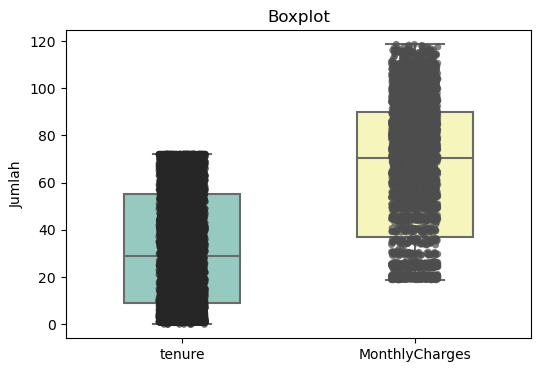

In [9]:
# melakukan pengecekan data outlier pada kolom 'tenure' dan 'MonthlyCharges'
kolom_boxplot = ['tenure', 'MonthlyCharges']
plt.figure(figsize=(6, 4))
sns.boxplot(data=df[kolom_boxplot], width=0.5, palette="Set3")
sns.stripplot(data=df[kolom_boxplot], jitter=True, color=".3", marker="o", alpha=0.7)
plt.title('Boxplot')
plt.ylabel('Jumlah')
plt.show()

### Pengecekan Missing Value

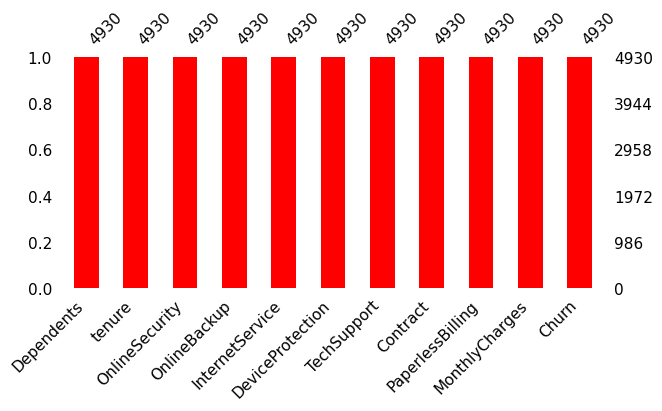

In [10]:
# melakukan pengecekan missing value
msno.bar(df, color="red", sort="ascending", figsize=(7, 3), fontsize=11)
plt.show()

### Pengecekan Duplikat

In [16]:
# menampilkan jumlah data duplikat
duplikat = df.duplicated().sum()
persentasi_duplikat = (df.duplicated().sum() / len(df)) * 100
print(f'Jumlah duplikat = {duplikat}, Persentasi duplikat = {persentasi_duplikat}')

Jumlah duplikat = 77, Persentasi duplikat = 1.561866125760649


In [15]:
# menampilkan contoh data duplikat
df[df.duplicated(keep=False)].sort_values(by=['tenure','InternetService','Churn']).head(6) # menggunakan 3 kolom secara acak hanya untuk menunjukkan bahwa data duplikat

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
436,No,1,No,No,DSL,No,No,Month-to-month,No,25.25,0
4452,No,1,No,No,DSL,No,No,Month-to-month,No,25.25,0
563,No,1,No,No,DSL,No,No,Month-to-month,Yes,45.70,1
707,No,1,No,No,DSL,No,No,Month-to-month,Yes,55.00,1
871,No,1,No,No,DSL,No,No,Month-to-month,No,44.40,1
1312,No,1,No,No,DSL,No,No,Month-to-month,No,45.30,1


In [17]:
# menghapus data duplikat
df.drop_duplicates(inplace=True) # data duplikat di hapus karena jumlahnya sangat sedikit 1.56%

# reset index untuk memperbaiki index yang hilang karena proses penghapusan data
df.reset_index(drop=True, inplace=True)

# pengecekan kembali data duplikat
df.duplicated().sum()

Data cleaning yang sudah dilakukan menghasilkan kesimpulan yaitu :
- Tidak ada missing value
- Tidak ada data outlier
- Penghapusan data duplikat
- Perubahan value *no internet service* menjadi *no* pada Kolom 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport'
- Perubahan value yes/no menjadi 1/0 pada kolom 'Churn'

## Data Analysis

### Kolom Numerik vs Churn

array([<Axes: title={'center': 'tenure'}>,
       <Axes: title={'center': 'MonthlyCharges'}>], dtype=object)

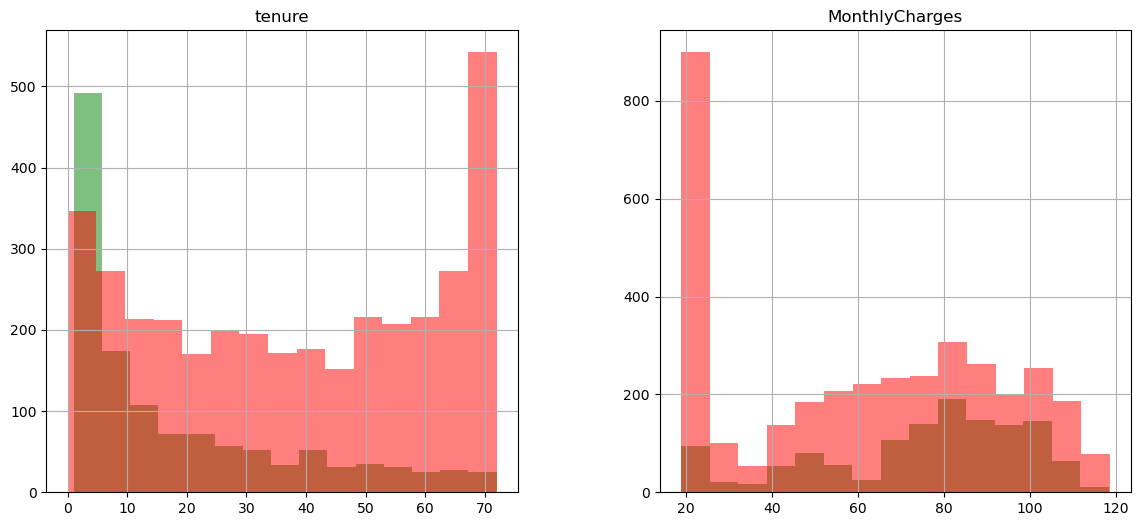

In [19]:
fig, ax = plt.subplots(1,2, figsize=(14,6))
df[df['Churn']==1][['tenure','MonthlyCharges']].hist(bins=15, color='green', alpha=0.5, ax=ax)
df[df['Churn']==0][['tenure','MonthlyCharges']].hist(bins=15, color='red', alpha=0.5, ax=ax)

Berdasarkan histogram diatas dapat disimpulkan :

1. berdasarkan tenure-nya, pelanggan baru atau pelanggan yang berlangganan kurang dari 6 bulan cenderung akan churn.
2. berdasarkan monthlycharges-nya, pelanggan dengan pembayaran rendah cenderung tidak akan churn dan terindikasi sebaliknya.

### Kolom Kategorik vs Churn

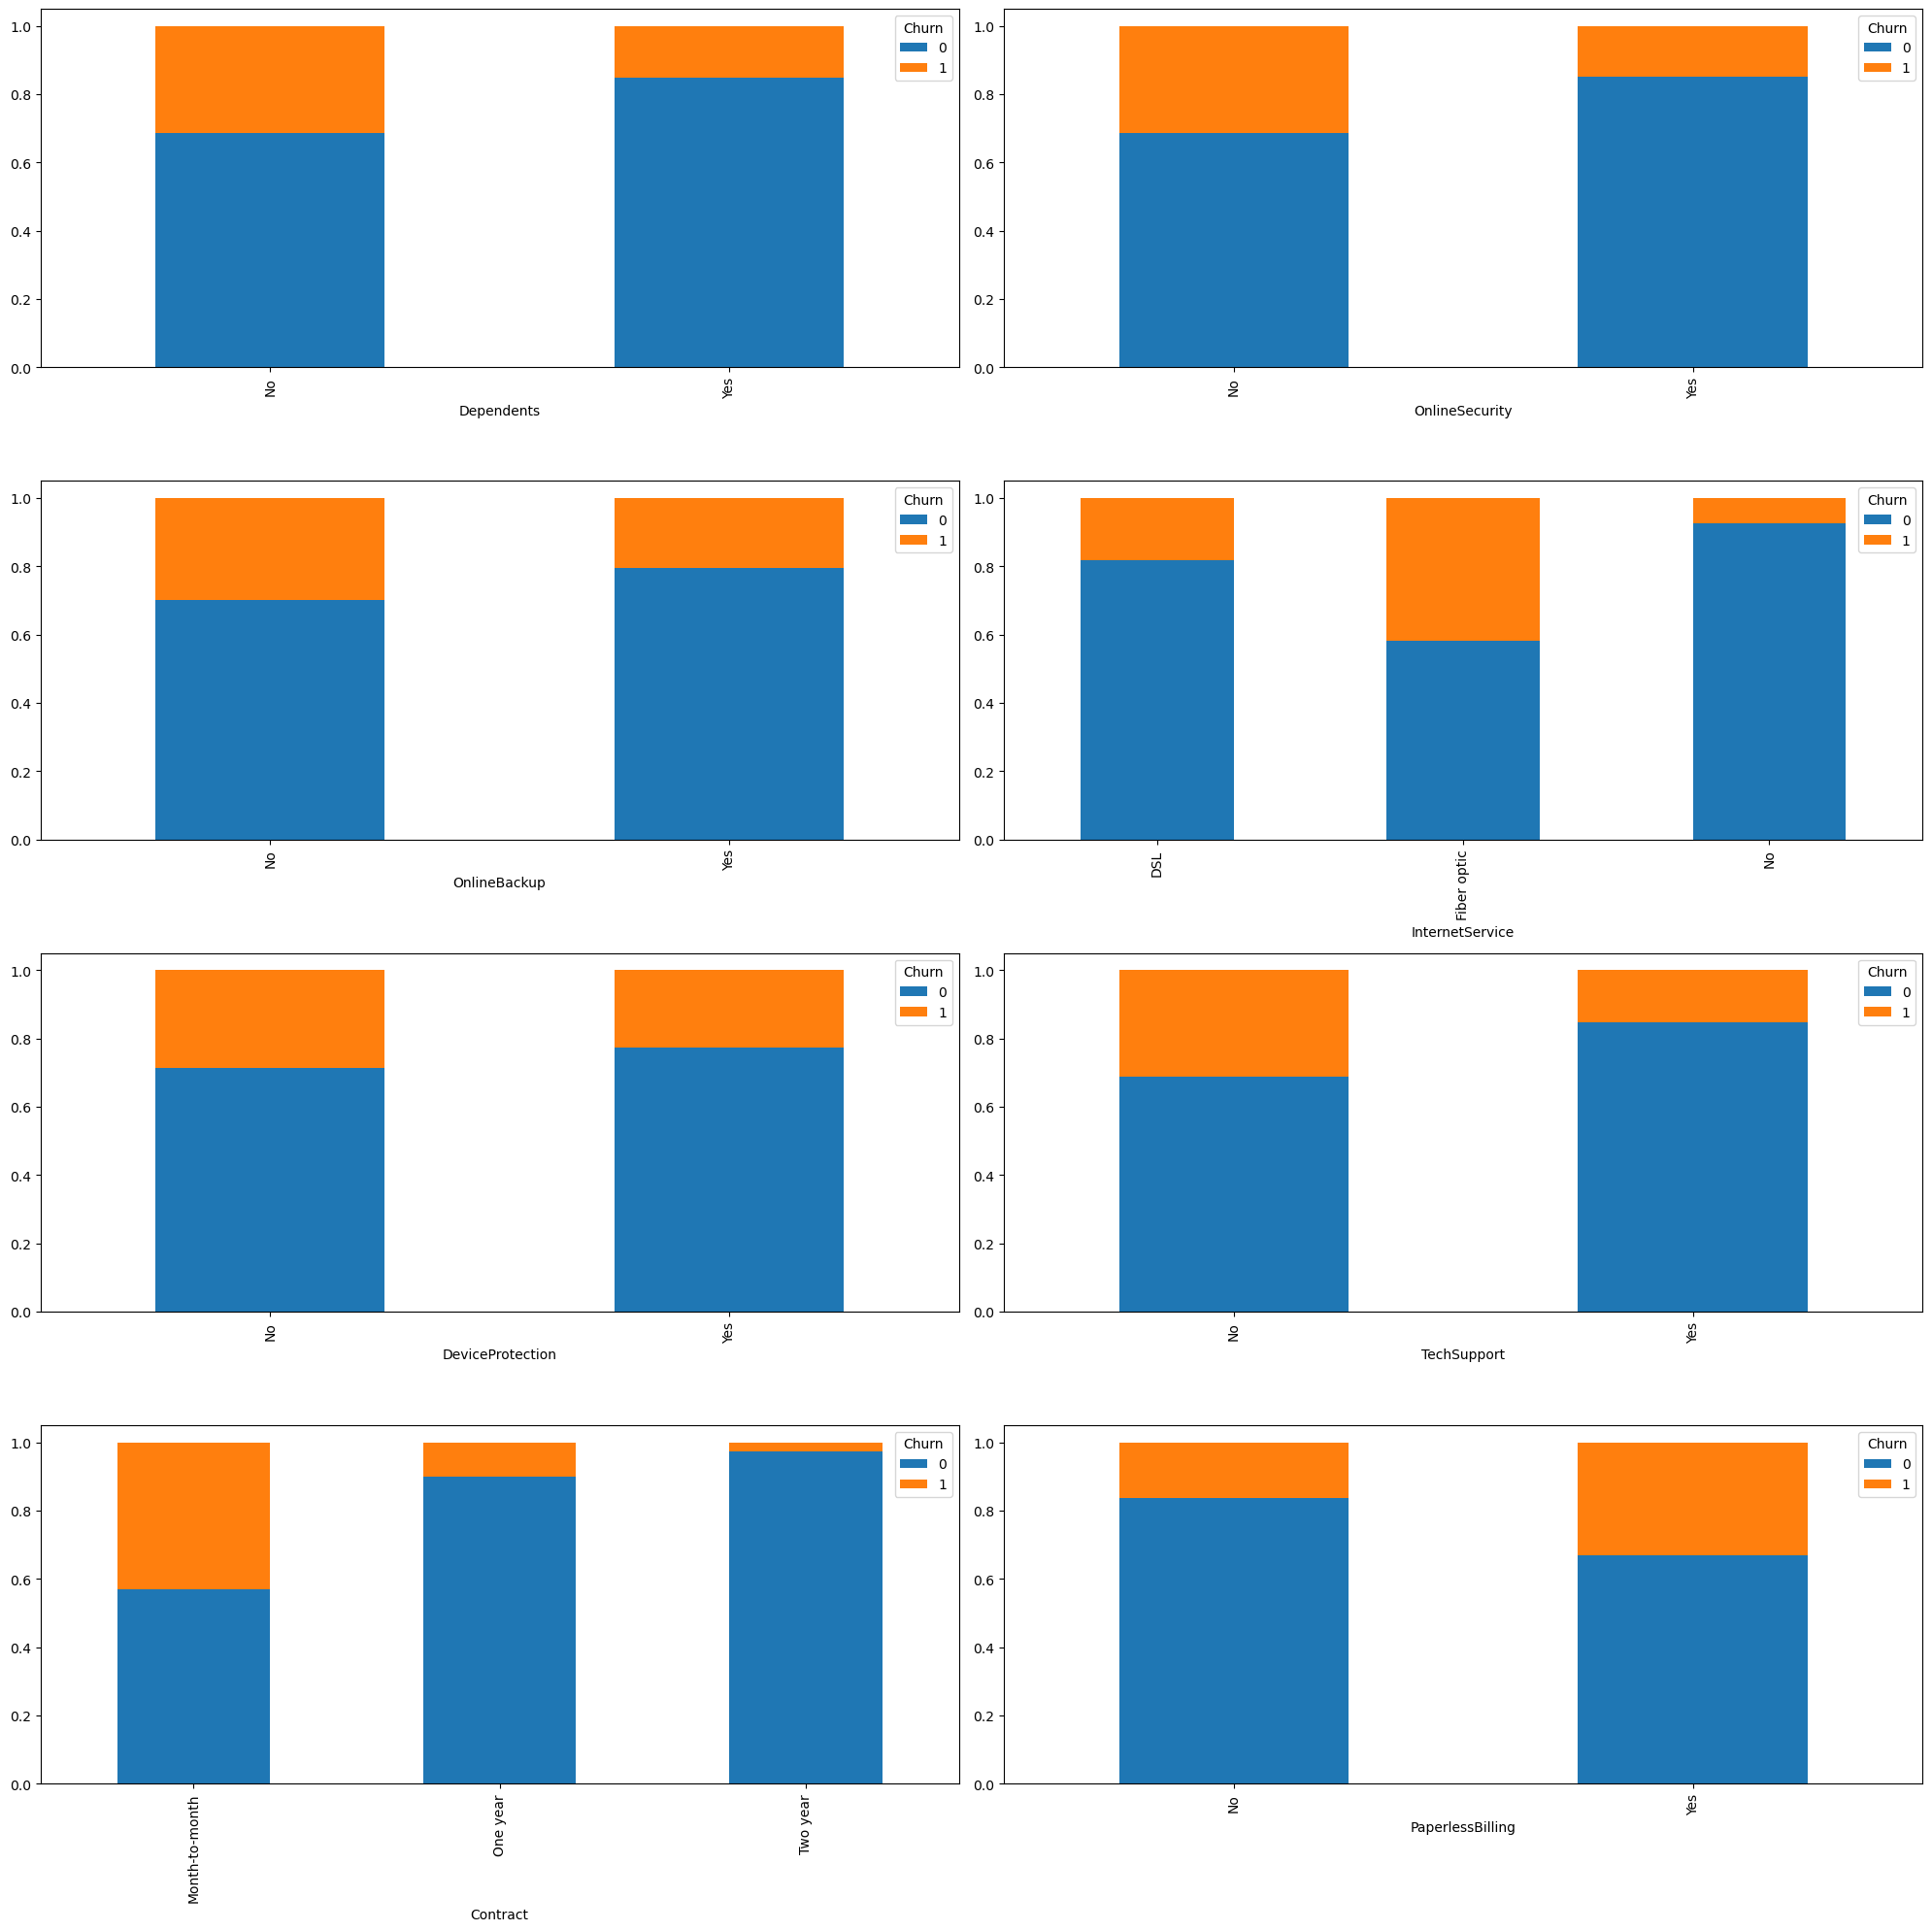

In [20]:
count = 0
fig = plt.figure(figsize=(20,20))

for i in df.drop(columns=['Churn','tenure','MonthlyCharges']).columns:
    count +=1
    ax= plt.subplot(4,2,count)
    pd.crosstab(df[i],df['Churn'],normalize=0).plot(kind='bar',stacked=True,ax=ax)
    fig.tight_layout()

plt.show()

In [18]:
for i in df.drop(columns=['Churn','tenure','MonthlyCharges']).columns:
    df_ct = df.groupby(i)['Churn'].value_counts(normalize=True).unstack()
    display(df_ct.sort_values(by=[1.0], ascending=False))

Churn,0,1
Dependents,,
No,0.685207,0.314793
Yes,0.847929,0.152071


Churn,0,1
OnlineSecurity,,
No,0.685656,0.314344
Yes,0.851748,0.148252


Churn,0,1
OnlineBackup,,
No,0.701999,0.298001
Yes,0.794947,0.205053


Churn,0,1
InternetService,,
Fiber optic,0.581244,0.418756
DSL,0.816627,0.183373
No,0.925224,0.074776


Churn,0,1
DeviceProtection,,
No,0.714060,0.285940
Yes,0.773104,0.226896


Churn,0,1
TechSupport,,
No,0.688244,0.311756
Yes,0.848011,0.151989


Churn,0,1
Contract,,
Month-to-month,0.568480,0.431520
One year,0.898565,0.101435
Two year,0.972003,0.027997


Churn,0,1
PaperlessBilling,,
Yes,0.668034,0.331966
No,0.835581,0.164419


Berdasarkan grafik bar dan tabel diatas dapat disimpulkan beberapa hal :

1. Pelanggan yang `Dependents` nya `No` atau tidak memiliki tanggungan lebih cenderung akan churn.
2. Pelanggan yang `OnlineSecurity` nya `No` atau tidak subscribe lebih cenderung akan churn.
3. Pelanggan yang `OnlineBackup` nya `No` atau tidak subscribe lebih cenderung akan churn.
4. Pelanggan yang `InternetService` nya `Fiber optic` lebih cenderung akan churn.
5. Pelanggan yang `DeviceProtection` nya `No` atau tidak subscribe lebih cenderung akan churn.
6. Pelanggan yang `TechSupport` nya `No` atau tidak subscribe lebih cenderung akan churn.
7. Pelanggan yang `Contract` nya `Month-to-month` atau yang berlangganan perbulan lebih cenderung akan churn.
8. Pelanggan yang `PaperlessBilling` nya `Yes` lebih cenderung akan churn.

Dapat disimpulkan secara garis besar bahwa pelanggan yang tidak melakukan subscribe layanan yang ditawarkan serta memilih kontrak produk layanan `Month-to-month` (bulanan) cenderung akan churn. 

## Data Preparation and Feature Engineering

In [13]:
df.head(5)

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,1
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,0
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,1
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,0
4,No,3,No,No,No,No,No,Month-to-month,Yes,23.60,0


Adapun tahap pre-processing yang perlu dilakukan diantaranya adalah :

   - Fitur Correlations : Mencari seberapa besar korelasi masing-masing fitur terhadap variabel target untuk melakukan seleksi sehingga fitur-fitur yang di masukkan kedalam model adalah fitur yang memiliki korelasi terhadap variabel target.
   - Normalisasi data: Mengubah skala data ke dalam rentang spesifik sehingga memiliki skala yang sama antar data. Dalam hal ini fitur scaling yang digunakan yaitu **Robust Scaler** karena data terdistribusi tidak normal (walaupun tidak ada outlier).
   - Encoding : Mengubah variabel kategorik menjadi bentuk yang dapat digunakan oleh model, dalam proses ini kita akan melakukan **One Hot Encoding** karena jumlah kategori tidak terlalu banyak dan tidak adanya hirarki pada setiap kolom/fitur.
   - Data Splitting : Melakukan seleksi fitur berdasarkan hasil dari tahapan Fitur Correlations serta memisahkan dataset menjadi bagian latihan (train) dan testing (test) untuk mengukur performa model secara objektif.

### Feature Correlations

Untuk mempermudah proses Feature Correlations akan dilakukan label encoder dan scalling diluar proses modelling menggunakan dataframe baru/sementara.

In [21]:
# merubah value dari masing-masing fitur menggunakan label encoder untuk keperluan Feature Correlations bukan untuk keperluan modelling
le = LabelEncoder()

# membuat dataframe baru untuk menyimpan hasil label encoder
df_new = df.copy(deep = True)
fitur_kategorikal = [i for i in list(df.columns) if i not in list(df.describe().columns)]

print('Label Encoder')
for i in fitur_kategorikal :
    df_new[i] = le.fit_transform(df_new[i])
    print(i,' : ',df_new[i].unique(),' = ',le.inverse_transform(df_new[i].unique()))

Label Encoder
Dependents  :  [1 0]  =  ['Yes' 'No']
OnlineSecurity  :  [0 1]  =  ['No' 'Yes']
OnlineBackup  :  [0 1]  =  ['No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
DeviceProtection  :  [1 0]  =  ['Yes' 'No']
TechSupport  :  [1 0]  =  ['Yes' 'No']
Contract  :  [0 2 1]  =  ['Month-to-month' 'Two year' 'One year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']


In [22]:
# melakukan scalling pada fitur numerikal di dataframe baru yang telah dibuat hanya untuk keperluan Feature Correlations
fitur_numerikal = ['tenure','MonthlyCharges']
scaler = RobustScaler()

df_new['tenure'] = scaler.fit_transform(df_new[['tenure']])
df_new['MonthlyCharges'] = scaler.fit_transform(df_new[['MonthlyCharges']])
df_new.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,1,-0.425532,0,0,0,1,1,0,1,0.046,1
1,0,-0.319149,0,1,1,1,0,0,1,0.241,0
2,0,0.744681,1,0,0,1,1,2,0,-0.455,1
3,0,0.914894,1,1,0,1,1,2,0,-0.019,0
4,0,-0.553191,0,0,2,0,0,0,1,-0.940,0


#### Kolom Kategorik vs Churn

Text(0.5, 1.0, 'Korelasi Fitur vs Churn')

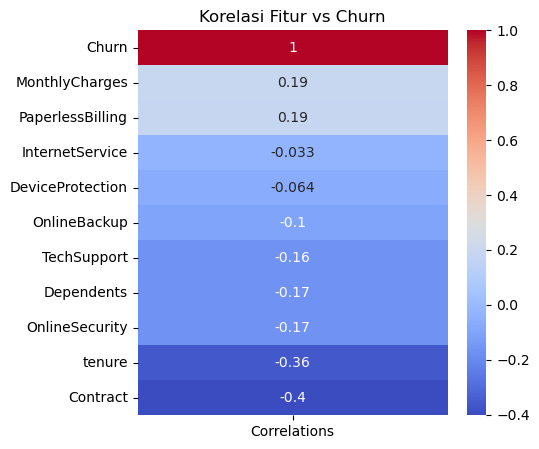

In [23]:
# menghitung korelasi masing-masing fitur terhadap target dengan metode corrwith
corr = df_new.corrwith(df_new['Churn']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']

plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap =  'coolwarm',linecolor = 'black');
plt.title('Korelasi Fitur vs Churn')

Text(0.5, 1.0, 'Fitur Kategorikal Terbaik')

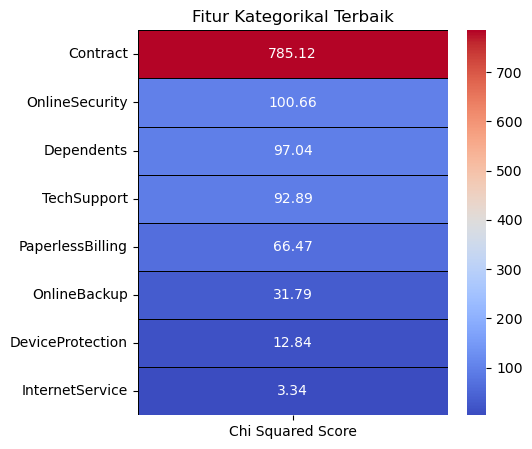

In [24]:
# memilih fitur terbaik berdasarkan skor yang dihitung oleh metode chi-squared
features = df_new.loc[:,fitur_kategorikal]
target = df_new.loc[:,'Churn']

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = 'coolwarm',linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Fitur Kategorikal Terbaik')

Dapat disimpulkan dari kedua metode di atas bahwa untuk fitur 'InternetService', 'DeviceProtection' dan 'OnlineBackup' memiliki korelasi atau skor (<=0.1 untuk metode corrwith dan dibawah 60 untuk metode chi-squared) yang rendah terhadap target/churn. Sehingga untuk keperluan model, kedua fitur tersebut tidak akan digunakan.

#### Kolom Numerik vs Churn

Text(0.5, 1.0, 'Seleksi Fitur Numerik')

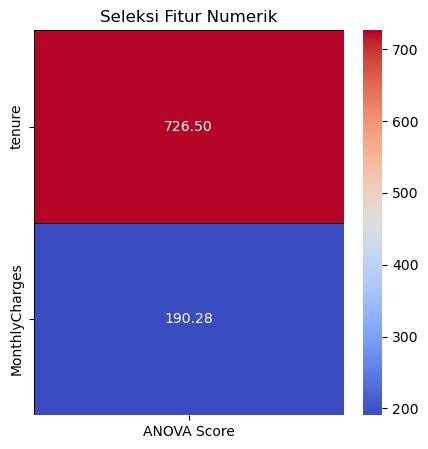

In [25]:
features = df_new.loc[:,fitur_numerikal]
target = df_new.loc[:,'Churn']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = 'coolwarm',linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Seleksi Fitur Numerik')

Karena fitur 'MonthlyCharges' memiliki skor cukup tinggi dan fitur 'tenure' memiliki skor sangat tinggi maka kedua fitur numerik akan tetap digunakan dalam modelling.

### Encoding

Digunakan one hot encoding karena variasi dari nilai pada masing-masing fitur sedikit dan tidak ada hirarki.

In [26]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['Dependents','OnlineSecurity', 
                                             'TechSupport', 'Contract','PaperlessBilling'])
], remainder='passthrough')

### Scalling

Digunakan robust scaler karna fitur numerik yang digunakan terdistribusi tidak normal.

In [27]:
scaler = RobustScaler()

### Splitting & Selection

In [28]:
# membuang kolom 'InternetService', 'DeviceProtection' dan 'OnlineBackup' pada dataframe original
df.drop(columns = ['InternetService','DeviceProtection','OnlineBackup'],inplace = True)
df.head()

,Dependents,tenure,OnlineSecurity,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,Yes,Month-to-month,Yes,72.90,1
1,No,14,No,No,Month-to-month,Yes,82.65,0
2,No,64,Yes,Yes,Two year,No,47.85,1
3,No,72,Yes,Yes,Two year,No,69.65,0
4,No,3,No,No,Month-to-month,Yes,23.60,0


In [33]:
# menampilkan jumlah data duplikat kedua kalinya setelah dilakukan drop kolom 'InternetService', 'DeviceProtection' dan 'OnlineBackup'
duplikat = df.duplicated().sum()
persentasi_duplikat = (df.duplicated().sum() / len(df)) * 100
print(f'Jumlah duplikat = {duplikat}, Persentasi duplikat = {persentasi_duplikat}')

Jumlah duplikat = 14, Persentasi duplikat = 0.288481351741191


In [35]:
# menghapus data duplikat kedua kalinya setelah dilakukan drop kolom 'InternetService', 'DeviceProtection' dan 'OnlineBackup'
df.drop_duplicates(inplace=True)

# reset index untuk memperbaiki index yang hilang karena proses penghapusan data
df.reset_index(drop=True, inplace=True)

# pengecekan kembali data duplikat
df.duplicated().sum()

0

In [37]:
# pendefinisian variabel dependent dan independent
x = df.drop(['Churn'], axis=1)
y = df['Churn']

In [38]:
# Splitting data train dan test dengan proporsi 80:20
x_train, x_test, y_train, y_test= train_test_split(
    x,
    y,
    stratify = y,
    test_size=0.2,
    random_state=200)

In [39]:
checking = pd.DataFrame(transformer.fit_transform(x_train),columns=transformer.get_feature_names_out())
checking.head(5)

,onehot__Dependents_Yes,onehot__OnlineSecurity_Yes,onehot__TechSupport_Yes,onehot__Contract_One year,onehot__Contract_Two year,onehot__PaperlessBilling_Yes,remainder__tenure,remainder__MonthlyCharges
0,0.0,0.0,0.0,1.0,0.0,1.0,69.0,26.30
1,0.0,0.0,0.0,0.0,0.0,1.0,2.0,74.90
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,44.75
3,0.0,1.0,0.0,1.0,0.0,1.0,45.0,100.30
4,1.0,1.0,1.0,0.0,1.0,1.0,0.0,52.55


## Modeling & Evaluation

Pada tahapan modeling awal, akan digunakan berbagai model untuk mengukur sejauh apa kualitas dari hasil masing-masing model. Tahap selanjutnya adalah memilih model terbaik untuk dilakukan *imbalance handling* serta *hyperparameter tuning* untuk meningkatkan kualitas hasil dari model tersebut.

Adapun model-model yang digunakan di tahap awal yaitu :

**1. Logistic Regression**

Logistic Regression adalah model regresi yang digunakan untuk masalah klasifikasi biner. Logistic Regression menghasilkan fungsi logistik yang mengubah nilai-nilai linier dari kombinasi linier fitur menjadi probabilitas kelas yang berbeda.

**2. K-Nearest Neighbors**

K-Nearest Neighbors adalah model klasifikasi yang melakukan prediksi berdasarkan mayoritas kelas dari k-neighbors terdekat dalam ruang fitur.

**3. Decision Tree**

Decision Tree adalah model yang memecah data menjadi subgrup yang lebih kecil seperti struktur pohon untuk melakukan prediksi berdasarkan keputusan yang diambil dari fitur data.

**4. Random Forest**

Random Forest adalah model ensemble yang terdiri dari banyak Decision Trees dan melakukan prediksi dari banyak pohon keputusan (Decision Trees) untuk menghasilkan prediksi yang lebih stabil dan akurat.

**5. XGBoost**

XGBoost membangun serangkaian pohon keputusan secara berurutan, dan setiap pohon berusaha memperbaiki kesalahan prediksi model sebelumnya.

**6. LightGBM**

LightGBM adalah implementasi algoritma gradient boosting yang efisien dan mendukung pelatihan pada dataset besar.

In [40]:
# pendefinisian masing-masing model
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()

### Benchmarking Model

In [41]:
# proses modelling menggunakan berbagai model
models = [logreg,knn,dt,rf,xgb,lgbm]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('scaler', scaler),
        ('model',i)])
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='roc_auc')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())

[LightGBM] [Info] Number of positive: 819, number of negative: 2277
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000754 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 340
[LightGBM] [Info] Number of data points in the train set: 3096, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.264535 -> initscore=-1.022530
[LightGBM] [Info] Start training from score -1.022530
[LightGBM] [Info] Number of positive: 820, number of negative: 2277
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 340
[LightGBM] [Info] Number of data points in the train set: 3097, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.264772 -> initscore=-1.021310
[LightGBM] [In

In [42]:
# menampilkan hasil dari model
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],
              'mean roc_auc':rata,'sdev':std}).set_index('model').sort_values(by='mean roc_auc',ascending=False)

,mean roc_auc,sdev
model,,
Logistic Regression,0.837207,0.013558
LightGBM,0.817066,0.012863
XGBoost,0.803156,0.017084
Random Forest,0.787228,0.016870
KNN,0.774585,0.017924
Decision Tree,0.640296,0.017430


Hasil menunjukkan model dengan nilai ROC_AUC paling tinggi yaitu model Logistic Regression dan terlihat stabil.

### Top 2 Benchmarking Model - Test Set Prediction

Memilih 2 model terbaik lalu melakukan prediksi terhadap data test set.

In [43]:
models = [logreg, lgbm]
score_roc_auc = []

def y_pred_func(i):
    estimator = Pipeline([
        ('preprocess', transformer),
        ('scaler', scaler),
        ('model', i)
    ])
    estimator.fit(x_train, y_train)
    y_pred = estimator.predict(x_test)
    return estimator, y_pred, x_test

for model, model_name in zip(models, ['Logistic Regression', 'LightGBM']):
    estimator, y_pred, x_test = y_pred_func(model)
    y_predict_proba = estimator.predict_proba(x_test)[:, 1]
    score_roc_auc.append(roc_auc_score(y_test, y_predict_proba))
    print(model_name, '\n', classification_report(y_test, y_pred))

results_df = pd.DataFrame({'model': ['Logistic Regression', 'LightGBM'],
                           'roc_auc_score': score_roc_auc}).set_index('model').sort_values(by='roc_auc_score', ascending=False)

print(results_df)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       712
           1       0.65      0.55      0.60       256

    accuracy                           0.80       968
   macro avg       0.75      0.72      0.73       968
weighted avg       0.79      0.80      0.80       968

[LightGBM] [Info] Number of positive: 1024, number of negative: 2847
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 340
[LightGBM] [Info] Number of data points in the train set: 3871, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.264531 -> initscore=-1.022549
[LightGBM] [Info] Start training from score -1.022549
LightGBM 
               precision    recall  f1-score   support

           0       0.83      0.8

Hasil pada data testing menunjukkan bahwa performa terbaik didapatkan oleh model Logistic Regression walaupun perbedaannya tidak signifikan dengan hasil dari model LightGBM

### Imbalance Handling

Dataset yang digunakan adalah dataset imbalance dimana kelas dengan 'churn' bernilai 0 jauh lebih dominan dari kelas dengan 'churn' bernilai 1. Perlu dilakukan proses tambahan untuk menjadi solusi dalam pengolahan data imbalance diantaranya adalah :

1. menambah data amatan,
2. menggunakan resampling seperti undersampling dan oversampling,
3. menggunakan algorithm tertentu,
4. penalized model.

Metode yang akan digunakan yaitu penalized model dengan memberikan pinalti terhadap model itu sendiri (dalam hal ini model Logistic Regression) dan metode oversampling SMOTE.

#### Penalized Model

Model yang digunakan adalah Logistic Regression dan jenis pinaltinya adalah menggunakan parameter class_weight yaitu 'balanced' karena untuk mengatasi perbedaan jumlah data churn-0 dengan churn-1 yang imbalance sehingga akan disesuaikan pembobotannya.

In [44]:
# modelling Logistic Regression dengan pinalti
model_lr_penalized = LogisticRegression(class_weight = 'balanced')
skfold = StratifiedKFold(n_splits=5)
estimator_p = Pipeline([
        ('preprocess',transformer),
        ('scaler', scaler),
        ('model',model_lr_penalized)])
model_cv_p = cross_val_score(estimator_p,x_train,y_train,cv=skfold,scoring='roc_auc')
print(model_cv_p)
print(model_cv_p.mean())

[0.86432606 0.8253096  0.83066141 0.8374641  0.82764371]
0.8370809741711873


In [45]:
# proses pelatihan
estimator_p.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'TechSupport', 'Contract',
                                                   'PaperlessBilling'])])),
                ('scaler', RobustScaler()),
                ('model', LogisticRegression(class_weight='balanced'))])

In [46]:
# proses prediksi pada data test
y_pred_p = estimator_p.predict(x_test)
print(classification_report(y_test, y_pred_p))

              precision    recall  f1-score   support

           0       0.91      0.70      0.79       712
           1       0.49      0.82      0.61       256

    accuracy                           0.73       968
   macro avg       0.70      0.76      0.70       968
weighted avg       0.80      0.73      0.74       968



In [47]:
# menghitung ROC AUC
y_pred_proba_p = estimator_p.predict_proba(x_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_proba_p)
print(f'ROC AUC adalah: {roc_auc}')

ROC AUC adalah: 0.8398492363061797


Hasil perbandingan antara model Logistic Regression biasa dengan Penalized Logistic Regression Model yaitu nilai presisinya menurun dari 65 menjadi 49 tetapi recallnya meningkat dari 55 menjadi 82.

#### SMOTE

In [56]:
# modelling Logistic Regression dengan SMOTE
model_lr_smote = LogisticRegression()
smote = SMOTE(sampling_strategy = 1)
skfold = StratifiedKFold(n_splits=5)
estimator_s = Pipeline([
        ('preprocess',transformer),
        ('scaler', scaler),
        ('balance', smote),
        ('model',model_lr_smote)])
model_cv_s = cross_val_score(estimator_s,x_train,y_train,cv=skfold,scoring='roc_auc')
print(model_cv_s)
print(model_cv_s.mean())

[0.86572957 0.8245786  0.83071285 0.83826996 0.82750654]
0.8373595038429885


In [57]:
# proses pelatihan
estimator_s.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'TechSupport', 'Contract',
                                                   'PaperlessBilling'])])),
                ('scaler', RobustScaler()),
                ('balance', SMOTE(sampling_strategy=1)),
                ('model', LogisticRegression())])

In [59]:
# proses prediksi pada data test
y_pred_s = estimator_s.predict(x_test)
print(classification_report(y_test, y_pred_s))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80       712
           1       0.50      0.81      0.62       256

    accuracy                           0.74       968
   macro avg       0.71      0.76      0.71       968
weighted avg       0.80      0.74      0.75       968



In [55]:
y_pred_proba_s = estimator_s.predict_proba(x_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_proba_s)
print(f'ROC AUC adalah: {roc_auc}')

ROC AUC adalah: 0.8391415028089887


Hasil perbandingan antara penalized Logistic Regression Model dengan SMOTE Logistic Regression Model yaitu nilai presisinya meningkat sedikit dari 49% menjadi 50% tetapi recallnya menurun sedikit dari 82 menjadi 81. Hasil ROC AUC nya sama yaitu bernilai 83.9%. Dapat disimpulkan bahwa kedua metode menghasilkan nilai yang sama. Namun karena hasil f1-score nya lebih baik dengan SMOTE maka untuk proses hyperparameter tuning akan menggunakan SMOTE.

### Hyperparameter Tuning

Selanjutnya akan dilakukan hyperparameter tuning pada model Logistic Regression dengan SMOTE untuk mencari model terbaik serta meningkat kualitas dari model dan dibandingkan dengan Logistic Regression dengan SMOTE default parameter.

**Logistic Regression Best Param vs Logistic Regression default**

In [60]:
# pendefinisian model, pipeline dan hyperparameter untuk model Logistic Regression
model_lr_smote = LogisticRegression()
smote = SMOTE()
skfold = StratifiedKFold(n_splits=5)

estimator_s = Pipeline([
    ('preprocess', transformer),
    ('scaler', scaler),
    ('balance', smote),
    ('model', model_lr_smote)
])

hyperparam_space = [{
    'model__penalty': ['l2', 'l1','none'],
    'model__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
    'model__solver':['liblinear','saga','lbfgs'],
    'balance__sampling_strategy': [0.5, 1, 1.5],
    'model__random_state': [200]
}]    

In [61]:
# menggunakan GridSearchCV untuk mencari model Logistic Regression terbaik
grid_s = GridSearchCV(
    estimator_s, 
    param_grid = hyperparam_space, 
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=200), 
    scoring='roc_auc', 
    n_jobs=-1)

grid_s.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=200, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Dependents',
                                                                          'OnlineSecurity',
                                                                          'TechSupport',
                                                                          'Contract',
                                                                          'PaperlessBilling'])])),
                                       ('scaler', RobustScaler()),
                                       ('balance', SMOTE()),
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'balance__sampling_strategy': [0.5, 1, 1.5],
                          'model__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                       1000, 10000],
                          'model__penalty': ['l2', 'l1', 'none'],
                          'model__random_state': [200],
                          'model__solver': ['liblinear', 'saga', 'lbfgs']}],
             scoring='roc_auc')

In [62]:
best_model = grid_s.best_estimator_
best_model.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'TechSupport', 'Contract',
                                                   'PaperlessBilling'])])),
                ('scaler', RobustScaler()),
                ('balance', SMOTE(sampling_strategy=1)),
                ('model',
                 LogisticRegression(C=1000, penalty='l1', random_state=200,
                                    solver='liblinear'))])

In [63]:
# pendefinisian model Logistic Regression dengan parameter default
estimator = Pipeline([
    ('preprocess',transformer),
    ('scaler', scaler),
    ('balance', smote),
    ('model',logreg)
])
estimator.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'TechSupport', 'Contract',
                                                   'PaperlessBilling'])])),
                ('scaler', RobustScaler()), ('balance', SMOTE()),
                ('model', LogisticRegression())])

In [64]:
# mencari best parameter setelah tuning
best_params = grid_s.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'balance__sampling_strategy': 1, 'model__C': 1000, 'model__penalty': 'l1', 'model__random_state': 200, 'model__solver': 'liblinear'}


default dari parameter model LogisticRegression : `penalty`='l2', `C`=1.0, `solver`='lbfgs'


In [65]:
# melakukan prediksi pada data test dan menampilkan ROC AUC score
y_pred_default = estimator.predict(x_test)
y_pred_proba_default = estimator.predict_proba(x_test)
y_pred_tuned = best_model.predict(x_test)
y_pred_proba_tuned = best_model.predict_proba(x_test)

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

print('ROC AUC Score default - Logistic Regression SMOTE : ', roc_auc_default)
print('ROC AUC Score Tuned - Logistic Regression SMOTE : ', roc_auc_tuned)

ROC AUC Score default - Logistic Regression SMOTE :  0.8399095856741574
ROC AUC Score Tuned - Logistic Regression SMOTE :  0.8392292837078653


In [66]:
# menampilkan Classification Report
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default - Logistic Regression SMOTE : \n', report_default)
print('Classification Report Tuned - Logistic Regression SMOTE : \n', report_tuned)

Classification Report Default - Logistic Regression SMOTE : 
               precision    recall  f1-score   support

           0       0.91      0.70      0.79       712
           1       0.49      0.82      0.61       256

    accuracy                           0.73       968
   macro avg       0.70      0.76      0.70       968
weighted avg       0.80      0.73      0.74       968

Classification Report Tuned - Logistic Regression SMOTE : 
               precision    recall  f1-score   support

           0       0.91      0.70      0.79       712
           1       0.50      0.82      0.62       256

    accuracy                           0.73       968
   macro avg       0.71      0.76      0.71       968
weighted avg       0.80      0.73      0.75       968



**Kesimpulan**

Dapat dilihat bahwa dari model Logistic Regression sebelum imbalance handling (dalam %) :
- precision 65
- recall 55
- f1-score 60
- ROC AUC score 84

Logistic Regression dengan SMOTE (dalam %) :
- precision 49
- recall 82
- f1-score 61
- ROC AUC score 83.9

Logistic Regression dengan SMOTE setelah hyperparameter tune (dalam %) :
- precision 50
- recall 82
- f1-score 62
- ROC AUC score 83.9

Pada hasil di atas dapat ditarik kesimpulan bahwa precision menurun sekitar 15% dari sebelum imbalance handling-tuning yaitu 65% menjadi 50% setelah imbalance handling-tuning. Recall meningkat sekitar 27% dari sebelum imbalance handling-tuning yaitu 55 menjadi 82 setelah imbalance handling-tuning. Untuk score ROC-AUC bisa dianggap sama.

### Feature Importances

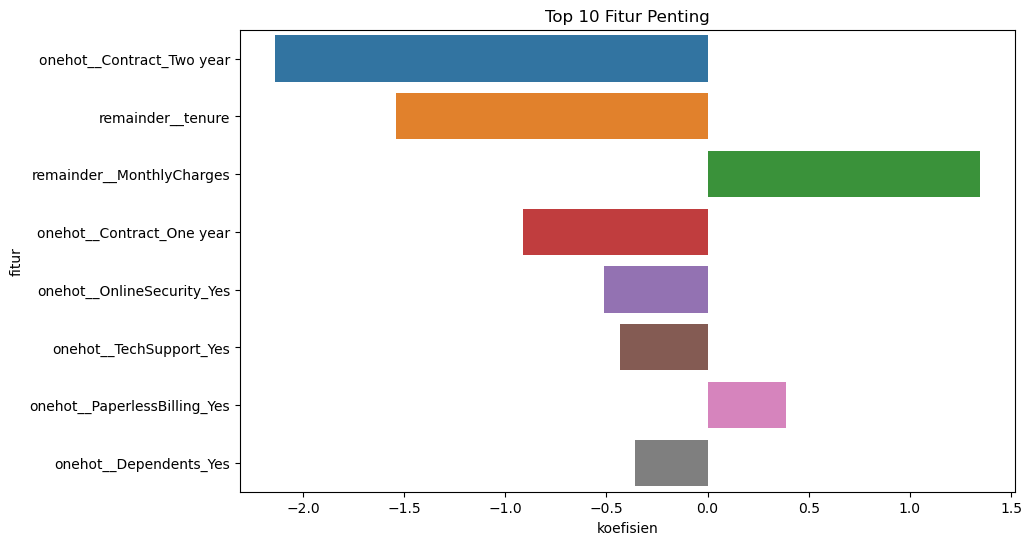

In [40]:
koefisien = best_model['model'].coef_.flatten()
fitur = transformer.get_feature_names_out()

df_fitur_i = pd.DataFrame({'fitur': fitur, 'koefisien': koefisien})

df_fitur_i['absolut_koefisien'] = df_fitur_i['koefisien'].abs()
df_fitur_i = df_fitur_i.sort_values(by='absolut_koefisien', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='koefisien', y='fitur', data=df_fitur_i, orient='h')
plt.title('Top 10 Fitur Penting')
plt.show()

Dapat dilihat fitur pada model yang sangat berpengaruh diantaranya adalah kolom Contract dan kolom Tenure. Berdasarkan pada bagian data analisis dapat disimpulkan kembali bahwa memang tenure berpengaruh terhadap churn pelanggan dimana pelanggan dengan tenure rendah cenderung akan churn sedangkan untuk contract `2 tahun` cenderung tidak akan churn bila dibandingkan dengan pelanggan yang contract-nya `bulanan`.

## Conclusion & Recommendation

In [67]:
print('Classification Report Tuned - Logistic Regression SMOTE : \n', report_tuned)

Classification Report Tuned - Logistic Regression SMOTE : 
               precision    recall  f1-score   support

           0       0.91      0.70      0.79       712
           1       0.50      0.82      0.62       256

    accuracy                           0.73       968
   macro avg       0.71      0.76      0.71       968
weighted avg       0.80      0.73      0.75       968



### Conclusion

Dapat disimpulkan bahwa model dapat melakukan prediksi sebesar 82% dari total pelanggan yang akan churn (berhenti berlangganan) dan melakukan prediksi sebesar 70% dari total pelanggan yang tidak akan churn (tetap berlangganan).

Kesimpulan lainnya adalah dari semua pelanggan yang diprediksi akan churn oleh model, hanya 50% dari prediksi tersebut yang benar-benar berhenti berlangganan. Selain itu ada juga pelanggan yang diprediksi akan churn tetapi tidak churn sebesar 30%.

Bila kita membandingkan Logistic Regression tuned(SMOTE) dengan Logistic Regression default ada peningkatan pada f1-score kelas churn(1) dari 60% menjadi 62%. Sedangkan nilai ROC-AUC bernilai sama. Maka dari itu model yang akan digunakan adalah model Logistic Regression tuned(SMOTE).

### Recommendation

Adapun rekomendasi yang dapat diberikan :

1. **Memberikan diskon** untuk pelanggan yang terindikasi akan churn`

Contoh kasus tanpa model :
- Bila terdapat 500 pelanggan baru yang terdaftar (250 pelanggan akan churn dan 250 pelanggan tidak akan churn)
- Pelanggan terindikasi churn adalah pelanggan yang tenure-nya <6 bulan dengan rata-rata 'MonthlyCharges' sebesar 56 USD
- Apabila pelanggan dengan tenure <6 diberikan diskon sebesar 25% dari 56 USD = 14 USD
- Total biaya untuk diskon adalah 14 USD * 250 = 7000 USD
- Biaya kerugian karena salah sasaran yaitu = 3500 USD

Contoh kasus dengan model :
- Total biaya = (14 USD * 205) + (14 USD * 75) = 2870 + 1050 = 3920 USD
- Biaya terbuang = 1050 USD
- Biaya penghematan = 82% * 250 pelanggan * 14 USD = 2870 USD

Dapat disimpulkan sebelum menggunakan model terdapat potensi kerugian sebesar 3500 USD namun setelah menggunakan model terdapat potensi penghematan sekitar 2870 USD.

2. **Meningkatkan kampanye** terkait layanan-layanan yang masih minim pelanggan seperti layanan `OnlineSecurity`, `OnlineBackup` dan `DeviceProtection`

3. **Menambah data observasi** dan fitur model untuk meningkatkan kualitas model

4. **Rutin melakukan evaluasi model** karena hasil model dapat berubah seiring dengan bertambahnya jumlah observasi.

## Save Model

In [76]:
best_model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'TechSupport', 'Contract',
                                                   'PaperlessBilling'])])),
                ('scaler', RobustScaler()),
                ('balance', SMOTE(sampling_strategy=1)),
                ('model',
                 LogisticRegression(C=1000, penalty='l1', random_state=200,
                                    solver='liblinear'))])

In [77]:
# Save model
import pickle

pickle.dump(best_model, open('TelcoChurn_LGR_RianPratamaPutra.sav', 'wb'))